In [2]:
import os
from scipy import ndimage
from skimage import exposure, filters
import subprocess
from nilearn.image import resample_to_img
import matplotlib as plt
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import shutil

In [ ]:
# Setup FSL environment (for brain extraction)
# Ensure FSLDIR is set
os.environ['FSLDIR'] = '/usr/local/fsl'
os.environ['PATH'] = os.environ['FSLDIR'] + '/bin:' + os.environ['PATH']

# Set FSLOUTPUTTYPE environment variable
os.environ['FSLOUTPUTTYPE'] = 'NIFTI_GZ'



La función `compare_sRMI_images` permite la visualización diseñada específicamente para el análisis comparativo de imágenes en formato NIfTI. Esta función permite comparar dos imágenes cerebrales lado a lado, mostrando las tres vistas ortogonales principales utilizadas en neuroimagen.

## Parámetros

| Parámetro | Tipo | Descripción |
|-----------|------|-------------|
| `nifti_path1` | `str` | Ruta al primer archivo NIfTI (.nii o .nii.gz) |
| `nifti_path2` | `str` | Ruta al segundo archivo NIfTI (.nii o .nii.gz) |
| `slice_index` | `int` | Índice del corte que se desea visualizar |
| `size1` | `tuple` | Tupla indicando el tamaño de la figura para la primera imagen (ancho, alto) |
| `size2` | `tuple` | Tupla indicando el tamaño de la figura para la segunda imagen (ancho, alto) |


```python
compare_sRMI_images(nifti_path1, nifti_path2, slice_index, size1=(10, 10), size2=(10, 10))
```

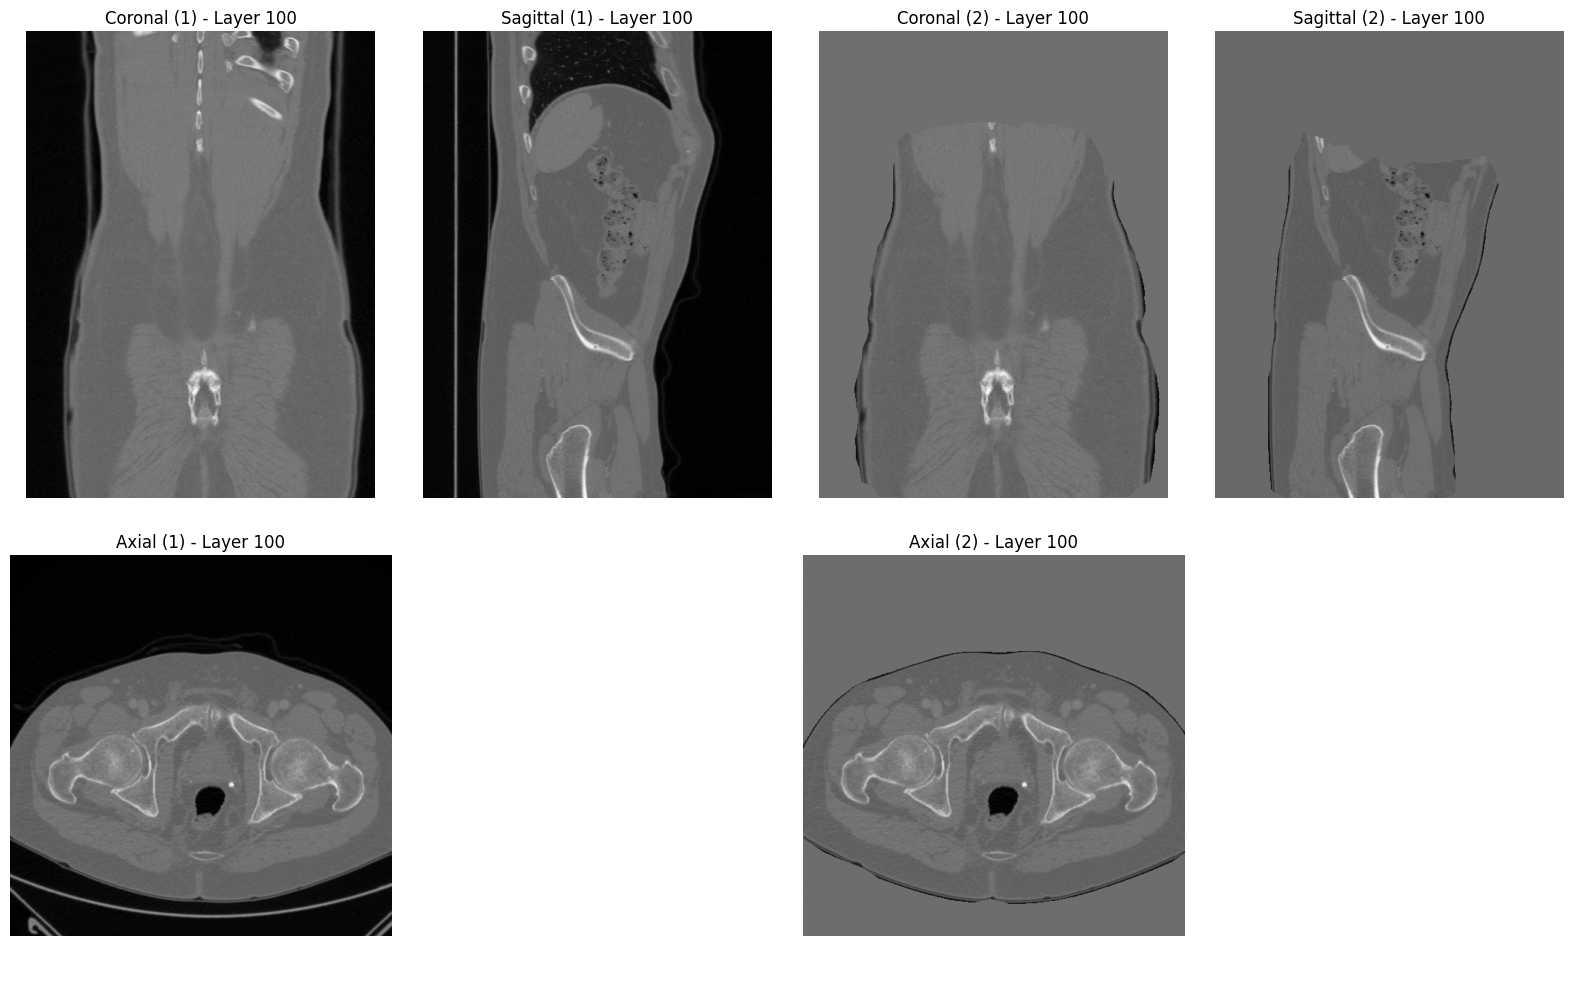

In [11]:
def compare_sRMI_images(nifti_path1, nifti_path2, slice_index, size1=(10, 10), size2=(10, 10)):
    """
    Loads two NIfTI images and shows three orthogonal slices: coronal (top), axial (bottom),
    and sagittal (right) for each image side by side.
    
    :param nifti_path1: Path to the first NIfTI file (.nii or .nii.gz).
    :param nifti_path2: Path to the second NIfTI file (.nii or .nii.gz).
    :param slice_index: Index of the slice you want to view.
    :param size1: Tuple indicating the size of the first image's figure.
    :param size2: Tuple indicating the size of the second image's figure.
    """
    # Load the NIfTI images
    img1 = nib.load(nifti_path1).get_fdata()
    img2 = nib.load(nifti_path2).get_fdata()
    
    # Validate slice_index
    min_index = min(img1.shape[0], img1.shape[1], img1.shape[2], img2.shape[0], img2.shape[1], img2.shape[2])
    if slice_index < 0 or slice_index >= min_index:
        print(f"Index out of range. It must be between 0 and {min_index - 1}.")
        return
    
    # Create subplots
    fig, axes = plt.subplots(2, 4, figsize=(size1[0] + size2[0], max(size1[1], size2[1])))
    
    # First image slices
    axes[0, 0].imshow(img1[:, slice_index, :].T, cmap="gray", origin="lower")
    axes[0, 0].set_title(f"Coronal (1) - Layer {slice_index}")
    axes[0, 0].axis("off")
    
    axes[1, 0].imshow(img1[:, :, slice_index].T, cmap="gray", origin="lower")
    axes[1, 0].set_title(f"Axial (1) - Layer {slice_index}")
    axes[1, 0].axis("off")
    
    axes[0, 1].imshow(img1[slice_index, :, :].T, cmap="gray", origin="lower")
    axes[0, 1].set_title(f"Sagittal (1) - Layer {slice_index}")
    axes[0, 1].axis("off")
    
    axes[1, 1].axis("off")  # Empty
    
    # Second image slices
    axes[0, 2].imshow(img2[:, slice_index, :].T, cmap="gray", origin="lower")
    axes[0, 2].set_title(f"Coronal (2) - Layer {slice_index}")
    axes[0, 2].axis("off")
    
    axes[1, 2].imshow(img2[:, :, slice_index].T, cmap="gray", origin="lower")
    axes[1, 2].set_title(f"Axial (2) - Layer {slice_index}")
    axes[1, 2].axis("off")
    
    axes[0, 3].imshow(img2[slice_index, :, :].T, cmap="gray", origin="lower")
    axes[0, 3].set_title(f"Sagittal (2) - Layer {slice_index}")
    axes[0, 3].axis("off")
    
    axes[1, 3].axis("off")  # Empty
    
    plt.tight_layout()
    plt.show()

# Example usage
image_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point4/data/CTLiver.nii.gz')
output_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point4/data/CTLiver_1.nii.gz')
slice_index = 100
compare_sRMI_images(image_path, output_path, slice_index, size1=(10, 10), size2=(6, 8))


Brain extraction completed. Output saved as /home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point4/data/CTLiver_1.nii.gz


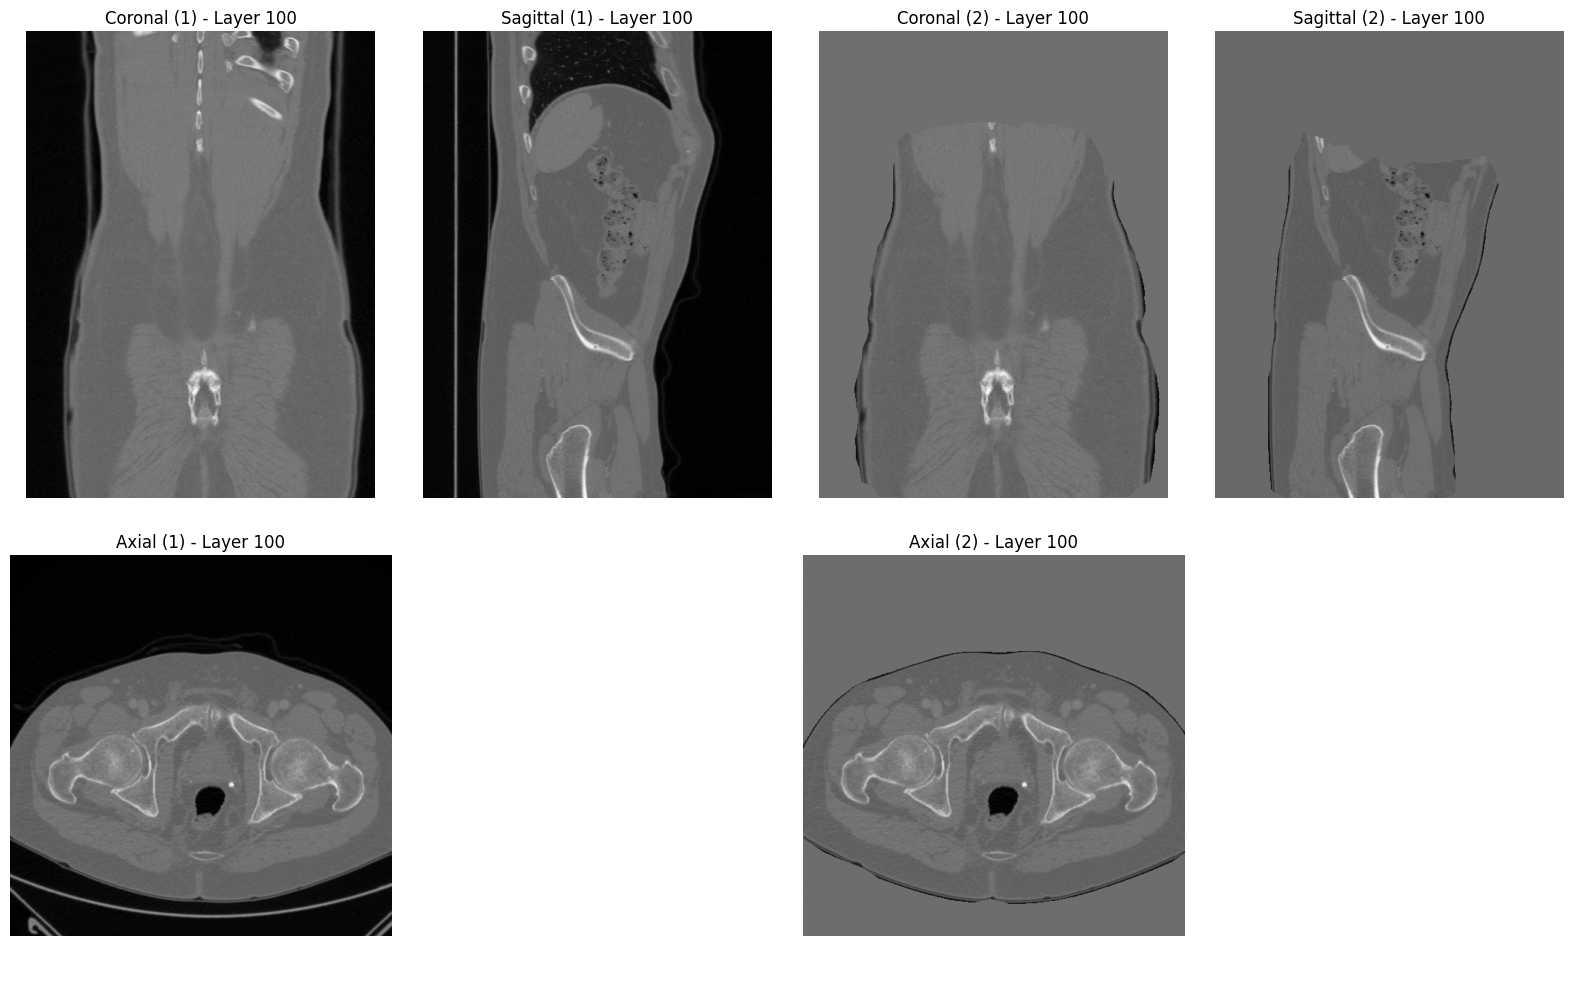

In [10]:
os.makedirs(os.path.dirname(output_path), exist_ok=True)

def skull_stripping(input_image, output_image):
    command = [
        'bet', input_image, output_image,
        '-f', '0.5', '-g', '0.2',
    ]
    result = subprocess.run(command, capture_output=True, text=True)
    if result.returncode == 0:
        print(f"Brain extraction completed. Output saved as {output_image}")
    else:
        print("Error in brain extraction:", result.stderr)

# Define the file paths
image_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point4/data/CTLiver.nii.gz')
output_path = os.path.normpath('/home/jp/Repositorios/UDEA/Digital_Image_Processing/Practice2/Point4/data/CTLiver_1.nii.gz')

# Call the function
skull_stripping(image_path, output_path)
slice_index = 100           # Index of the slice to display

compare_sRMI_images(image_path, output_path, slice_index, size1=(10, 10), size2=(6, 8))

